![](https://storage.googleapis.com/kaggle-datasets-images/310/684/3503c6c827ca269cc00ffa66f2a9c207/dataset-cover.jpg)


# <p><center style="background-color:#AAB1F9   ;font-family:Gabriola;color:#662200;font-size:210%;text-align:center;border-radius:10px 70px;">   Credit Card Fraud Detection 📰 </center></p>

# 1: Import Libraries
<a id="1"></a>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h1  style="text-align: center" class="list-group-item list-group-item-action active">1. Introduction</h1><a id = "1" ></a>



We all know the Importance of good features for machine learning models. In Machine learning task we have features which we need to process to make them good and this is done by data preprocessing  tasks.

**Data Preprocessing** : Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model. When creating a machine learning project, it is not always a case that we come across the clean and formatted data. And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.

A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.

Data Preprocessing involves below steps:

- Getting the dataset
- Importing libraries
- Importing datasets
- Finding Missing Data
- Encoding Categorical Data

Many of us know traditional approaches for above listed steps but in this notebook I will discuss some different approaches which could be game changer for your next project. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from keras.models import Sequential

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

from sklearn.svm import SVC
from keras.layers import Dense
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# 2: Read Dataset
<a id="2"></a>
⬆️ [Tabel of Contents](#contents_tabel) 

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# 3: Dataset Overview
<a id="3"></a>
⬆️ [Tabel of Contents](#contents_tabel)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
    <h2 style="color: #8B4513;">Inference </h2>
    <ul>
        <li>It contains <b>284,807</b> entries and <b>31 columns.</b> entries.</li>
        <li>All columns have non-null values..</li>
        <li>The columns are labeled as 'Time', 'V1' through 'V28', 'Amount', and 'Class'..</li>
        <li>The 'Class' column appears to be the target variable, with values indicating whether a transaction is fraudulent (1) or not (0)..</li>
        <li>The 'Time' column represents the time elapsed since the first transaction.</li>
        <li>Columns<b>'V1'</b> through </b>'V28'</b> contain anonymized numerical features, likely derived from the transaction data.</li>
        <li>The 'Amount' column represents the transaction amount.</li>
        <li>The data types are mostly float64 for numerical features and int64 for the 'Class' column.</li>
    </ul>
</div>


## 3.1: Summary Statistics for Numerical Variables
<a id="3.1"></a>

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
    <h2 style="color: #8B4513;">Inference </h2>
          <li>The 'Class' column is highly imbalanced, with one class (Class 0) having <b>284,315</b> instances and the other             class (Class 1) having only <b>492</b> instances..</li>
          <li>This indicates a severe <b>class</b> imbalance, where the majority class  <b>(Class 0)</b> significantly                   outnumbers the minority class <b>(Class 1)</b>..</li>
            <li>Class imbalance can pose challenges for machine learning models, as they may have a tendency to perform poorly            on the minority class due to biased learning..</li>
           <li>In cases of severe class imbalance, special attention is required during model training, evaluation, and                    selection of appropriate evaluation metrics..</li>
           <li>Techniques such as resampling (oversampling of minority class or undersampling of majority class), using                   different algorithms capable of handling imbalanced data, or employing ensemble methods can help address the                  imbalance issue..</li>
            <li>Evaluation metrics such as precision, recall, F1-score, and area under the ROC curve (AUC-ROC) are more                    suitable for imbalanced datasets compared to simple accuracy.</li>
    </ul>
</div>


In [8]:
df.shape

(284807, 31)

##  Null vallue
<a id="3.1"></a>

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This dataset is highly unbalanced



0 --> normal transaction


1 --> fraudulent transaction

In [10]:
#separeting the data for analysis
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [11]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
 <h2 style="color: #8B4513;">Inference </h2


It seems like you've separated your dataset into two subsets: one containing legitimate transactions <b>(legit)</b> and the other containing fraudulent transactions <b>(fraud)</b>.

The output you provided indicates that the legit subset contains <b>284,315</b> instances and the fraud subset contains <b>492</b> instances. This confirms the highly unbalanced nature of your dataset, with a significantly larger number of legitimate transactions compared to fraudulent ones.



In [12]:
#statistical measure of data
pd.concat([legit.Amount.describe(), legit.Time.describe()],  axis=1)

,Amount,Time
count,284315.000000,284315.000000
mean,88.291022,94838.202258
std,250.105092,47484.015786
min,0.000000,0.000000
25%,5.650000,54230.000000
50%,22.000000,84711.000000
75%,77.050000,139333.000000
max,25691.160000,172792.000000


In [13]:
pd.concat([fraud.Amount.describe(), fraud.Time.describe()],  axis=1)

,Amount,Time
count,492.000000,492.000000
mean,122.211321,80746.806911
std,256.683288,47835.365138
min,0.000000,406.000000
25%,1.000000,41241.500000
50%,9.250000,75568.500000
75%,105.890000,128483.000000
max,2125.870000,170348.000000


## compare the value for both transaction
<a id="3.1"></a>

In [14]:
#compare the value for both transaction
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h2 style="color: #8B4513;">Inference </h2>

Comparison of transaction values: You've grouped the dataset by the Class column **(0 for normal transactions, 1 for fraudulent transactions)** and calculated the mean values of various features for each class.


Under-Sampling

Build a sample dataset containing similar distribution of normal transaction and Fraulent Transactions

Number of Fraudulent Transactions-->492

In [15]:
legit_sample=legit.sample(n=492)

concatenating two data Frames
<a id="3.1"></a>

In [16]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [17]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
55825,47141.0,-2.015391,-0.131818,1.132650,0.561549,1.520495,-1.831706,0.527380,-0.074183,-0.396697,...,-0.041395,-0.092402,0.442609,0.212263,0.871906,-0.386589,-0.026574,0.103625,1.00,0
109321,71329.0,0.766924,-1.782351,0.962067,-0.250325,-1.830333,0.400168,-1.063705,0.340307,0.040203,...,0.227043,0.203711,-0.149697,0.240552,0.116171,-0.266410,0.011512,0.053433,254.64,0
209665,137654.0,-0.815649,-0.482664,2.891747,-1.225839,-1.255188,1.304424,-1.062380,0.685643,0.733188,...,-0.371171,-0.176584,-0.318221,0.483616,0.384992,0.868292,0.315821,0.132785,22.50,0
213533,139292.0,0.567749,1.065639,-0.845854,1.199869,0.269455,-0.047718,0.265030,-0.265627,0.174493,...,0.063414,0.282719,0.238082,0.433011,-1.472694,0.577067,-0.368517,0.099603,26.89,0
281931,170539.0,1.921440,-1.234405,-1.748963,-1.089485,-0.217606,-0.253579,-0.315847,-0.178056,-0.804574,...,0.564234,1.261019,-0.176656,0.298907,0.180455,0.037961,-0.068081,-0.045769,164.70,0


In [18]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h2 style="color: #8B4513;">Inference </h2>

This balanced dataset (new_dataset) can now be used for further analysis, feature engineering, model training, or any other tasks you have planned. With a balanced class distribution, you can train machine learning models more effectively, ensuring they learn from both normal and fraudulent transactions without bias towards the majority class.


In [19]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [20]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,98346.048780,0.040430,-0.044930,-0.013976,0.101273,0.071457,0.029751,-0.047659,-0.015211,0.076123,...,0.047391,-0.007237,-0.031870,-0.020412,0.022987,-0.021769,-0.034752,0.013237,-0.013455,94.941870
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


splitting the data into Feature& Target

In [21]:
X = new_dataset.drop(columns='Class',axis=1)
y = new_dataset['Class']

In [22]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
55825    47141.0 -2.015391 -0.131818  1.132650  0.561549  1.520495 -1.831706   
109321   71329.0  0.766924 -1.782351  0.962067 -0.250325 -1.830333  0.400168   
209665  137654.0 -0.815649 -0.482664  2.891747 -1.225839 -1.255188  1.304424   
213533  139292.0  0.567749  1.065639 -0.845854  1.199869  0.269455 -0.047718   
281931  170539.0  1.921440 -1.234405 -1.748963 -1.089485 -0.217606 -0.253579   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [23]:
print(y)

55825     0
109321    0
209665    0
213533    0
281931    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split into training and test sets

In [24]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)


In [25]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


# Visualize the 'Amount' column to identify outliers

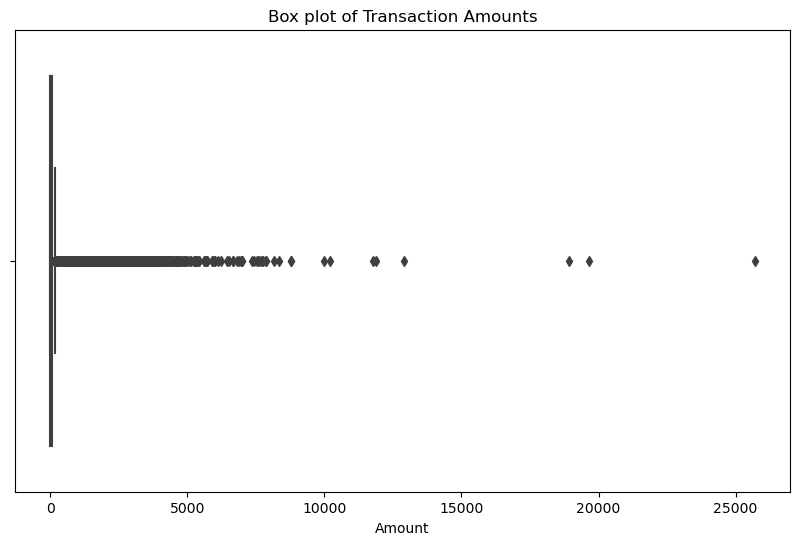

In [26]:
# Visualize the 'Amount' column to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Amount'])
plt.title('Box plot of Transaction Amounts')
plt.show()

# Detect outliers 

    IQR method

In [27]:
# Detect outliers using the IQR method
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

   boundaries

In [28]:
# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Filter out

In [29]:
# Filter out the outliers
df_outliers_removed = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

# Display the cleaned dataset

In [30]:
# Display the cleaned dataset
print(df_outliers_removed.head())

# Check the shape of the cleaned dataset
print(df_outliers_removed.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
5  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   

        V26       V27       V28 

<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
    <h2 style="color: #8B4513;">Inference </h2>
    <h3>Credit card:</h3>
    <ul>
        <li>The cleaned dataset retains the same structure as the original dataset, containing <b>252</b>,<b>903</b> rows and <b>31</b> columns.</li>
        <li>Each row represents a transaction, and each column represents a specific feature of that transaction, including  <b>'Time'</b>,  <b>'V1'</b> through  <b>'V28'</b>,  <b>'Amount'</b>, and  <b>'Class'</b>..</li>
        <li>The <b>'Class'</b> column indicates whether a transaction is normal <b>(Class 0)</b> or fraudulent <b>(Class 1)</b>..</li>
        <li>Other columns ('Time', 'V1' through 'V28', 'Amount') likely represent various features extracted from transaction data..</li>
        
</div>


# :Exploratory Data Analysis
<a id="3"></a>
⬆️ [visualization of contant]

(i)  Distribution of the Target Variable
<a id="3"></a>

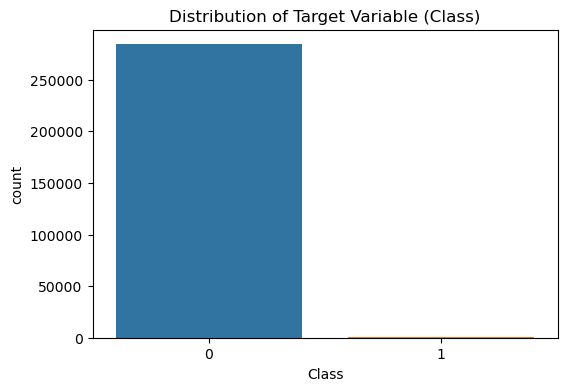

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [31]:
# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
marker=dict(color="Red")
plt.title('Distribution of Target Variable (Class)')
plt.show()

# Print the percentage of fraudulent transactions
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)


<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
    <h2 style="color: #8B4513;">Inference </h2>
    <ul>
        <li>The dataset exhibits a severe class imbalance, with the vast majority <b>(approximately 99.83%)</b> of transactions being normal (Class 0), and only a very small proportion <b>(approximately 0.17%)</b> being fraudulent (Class 1).</li>
        <li>The most common cap shape is <b>x</b> (convex), which occurs <b>26934</b> times.</li>
        <li>Such a high class imbalance can pose challenges for training machine learning models, as they may become biased toward the majority class and have difficulty learning patterns from the minority class..</li>
        <li>When dealing with imbalanced datasets, it's essential to employ appropriate techniques such as resampling methods, using different evaluation metrics, and selecting algorithms robust to class imbalance to ensure fair and accurate model performance.</li>
   </ul>
</div>


(II)histplot  Distribution of transaction amounts by class

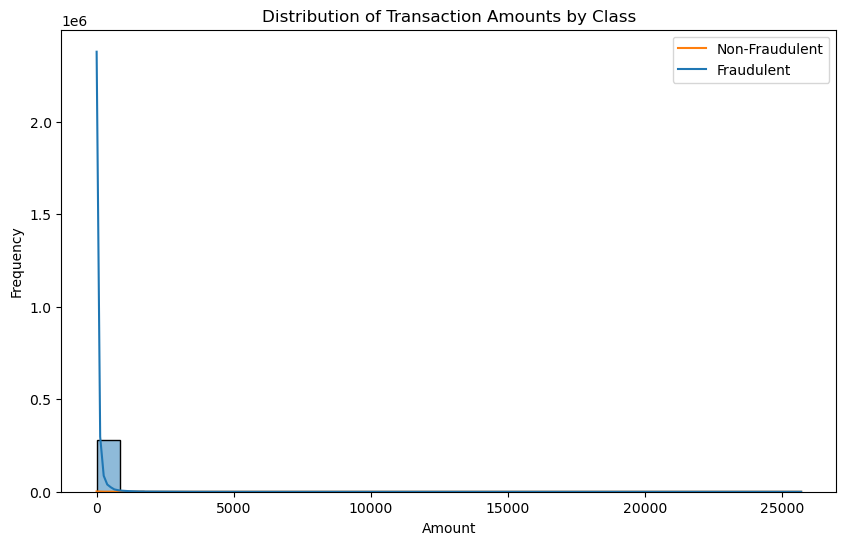

In [32]:
# Distribution of transaction amounts by class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=30, kde=True)
plt.title('Distribution of Transaction Amounts by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend(['Non-Fraudulent', 'Fraudulent'])
plt.show()

<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h2 style="color: #8B4513;">Inference </h2>

a histogram visualizing the distribution of transaction amounts by class. It appears to show that there are more fraudulent transactions than non-fraudulent transactions. The x-axis represents the transaction amount, while the y-axis represents the frequency of transactions. The blue colored distribution represents non-fraudulent transactions, and the orange colored distribution represents fraudulent transactions.

Here are some additional observations:

<li>The distribution of fraudulent transactions appears to be wider than the distribution of non-fraudulent transactions, suggesting that fraudulent transactions have a greater range of amounts.</li>
<li>There is some overlap between the two distributions, indicating that there are some fraudulent transactions that have amounts similar to non-fraudulent transactions, and vice versa.</li>

(iii)Distribution of transaction times by class in histoplot

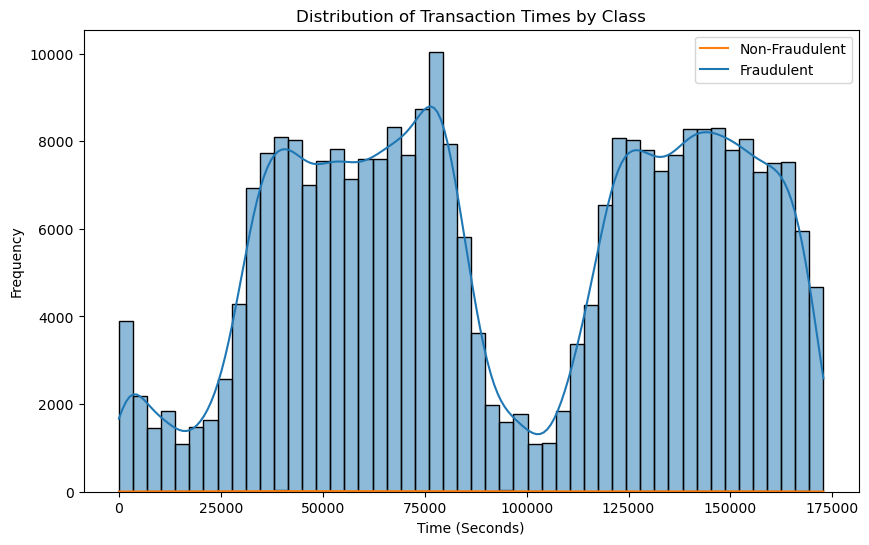

In [33]:
# Distribution of transaction times by class
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Time', hue='Class', bins=50, kde=True)
plt.title('Distribution of Transaction Times by Class')
plt.xlabel('Time (Seconds)')
plt.ylabel('Frequency')
plt.legend(['Non-Fraudulent', 'Fraudulent'])
plt.show()

<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h2 style="color: #8B4513;">Inference </h2>

Here are some observations from the graph:

<li>The distribution of transaction times for both classes appears to be right-skewed, meaning there are more transactions that take less time to complete than transactions that take a long time.</li>
<li>The peak transaction time for non-fraudulent transactions appears to be lower than the peak transaction time for fraudulent transactions. This suggests that non-fraudulent transactions tend to be completed more quickly than fraudulent transactions.</li>
<li>There is some overlap between the two distributions, indicating that there are some fraudulent transactions that take a similar amount of time as non-fraudulent transactions, and vice versa</li>

(iv) Heatmap

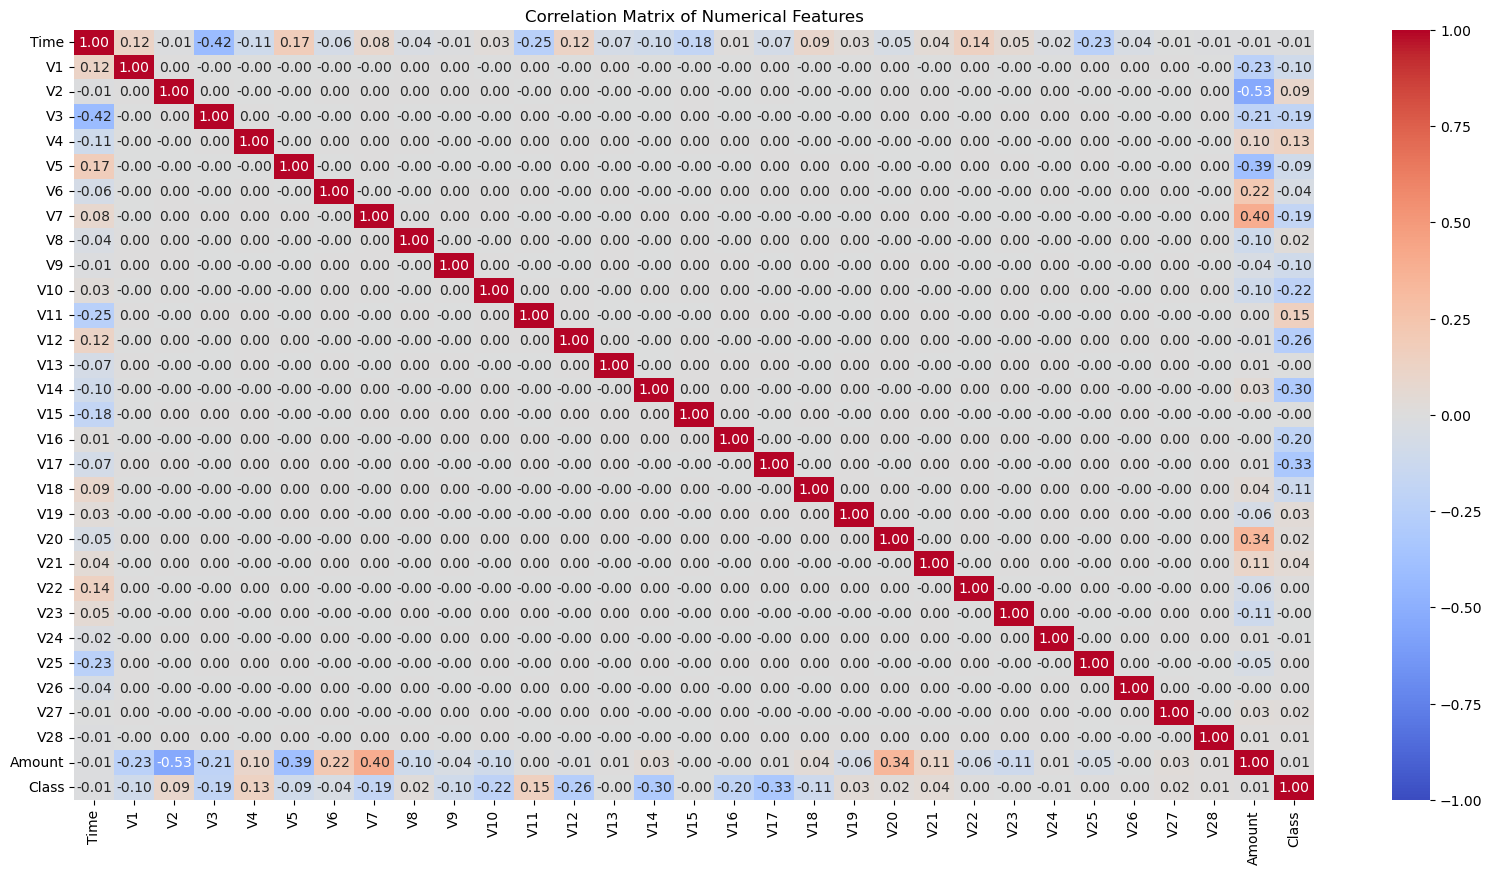

In [34]:
# For example, you can select all columns with numerical data types
numerical_features = df.select_dtypes(include=['int', 'float'])
# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h2 style="color: #8B4513;">Inference </h2>

Here are some observations from the graph:


 Each cell shows the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1, where 1 represents a perfect positive correlation, -1 represents a perfect negative correlation, and 0 represents no correlation.

The heatmap you sent appears to show the correlation matrix of the ASAS HI and its components in axial spondyloarthritis. ASAS HI stands for Assessment of SpondyloArthritis International Society - Health Index. Spondyloarthritis is a type of inflammatory arthritis that can affect the spine and other joints. The ASAS HI is a questionnaire used to assess the health status of people with spondyloarthritis.

The specific components of the ASAS HI that are included in the correlation matrix are not shown in the image. However, the fact that the correlation matrix includes the ASAS HI suggests that the researchers were interested in examining the relationships between the different components of the ASAS HI and overall health status in people with axial spondyloarthritis.




(v)BOXPLOT IN DENSITY

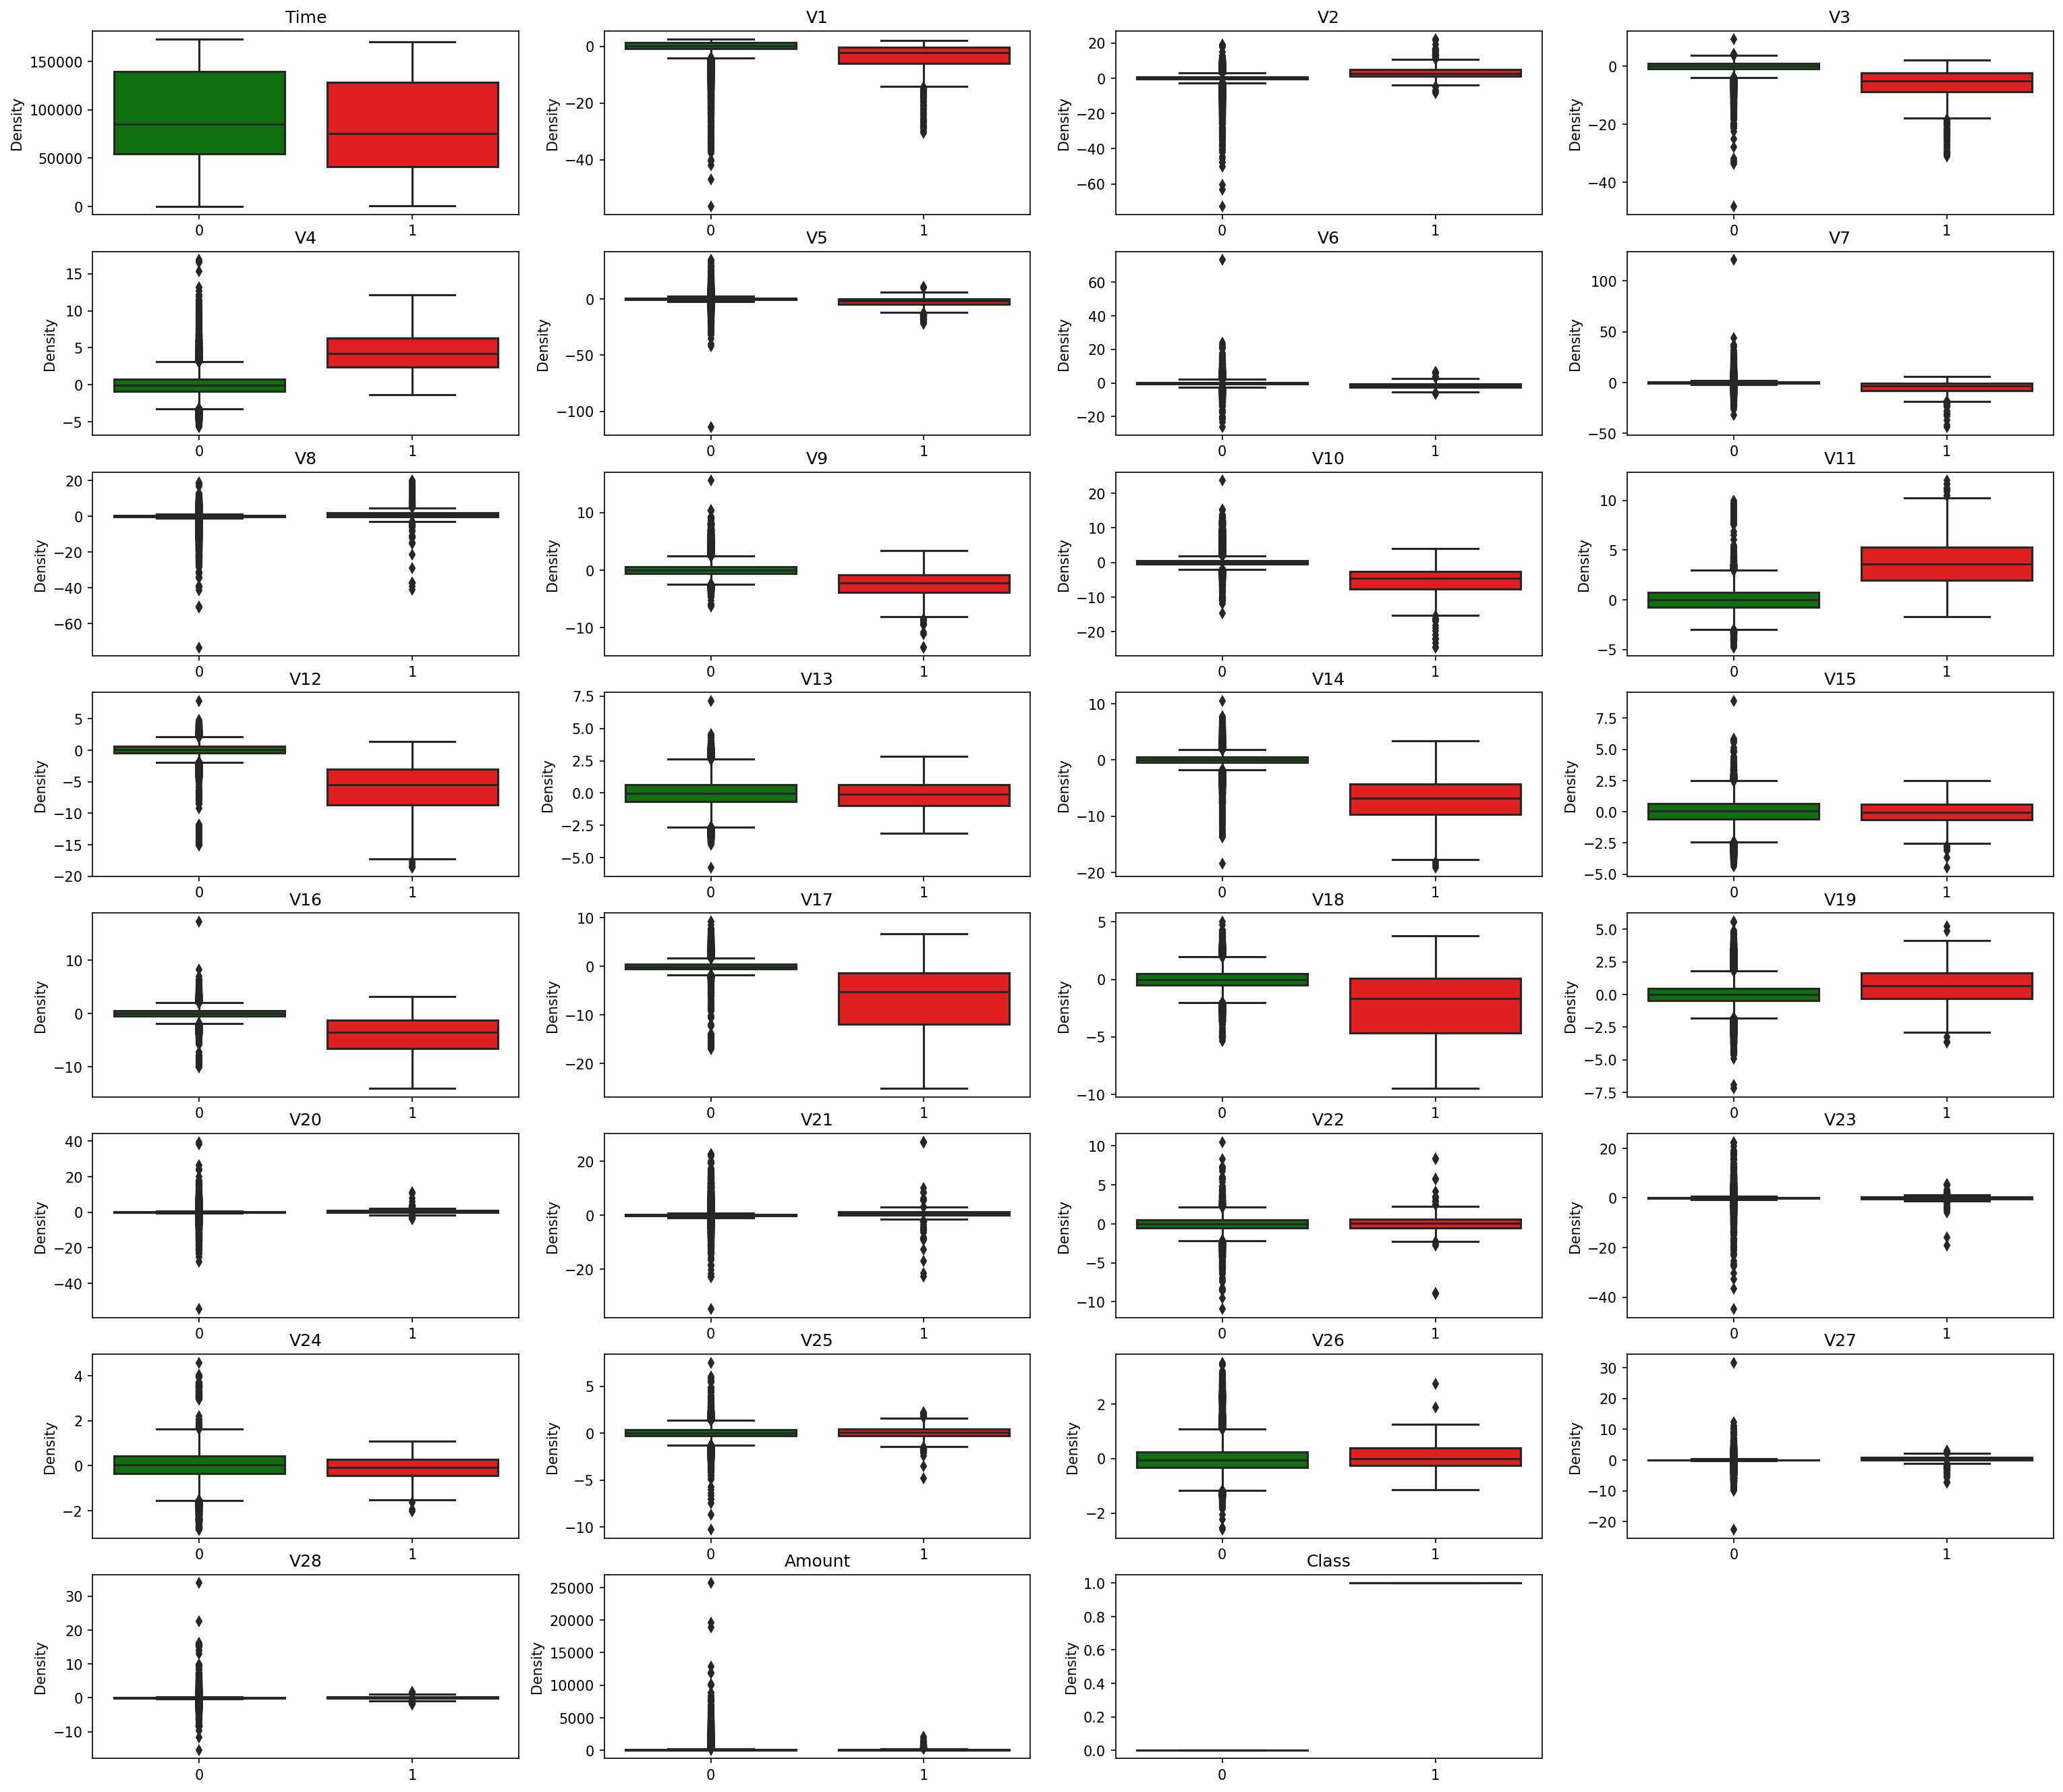

In [35]:
columns = df.iloc[:,1:29].columns
columns = df.columns
plt.figure(figsize= (25,25), dpi=150)
colors = ['g', 'r']

for n, col in enumerate(df[columns]):
    ax = plt.subplot(9,4, n+1)
    sns.boxplot(x = 'Class', y= col, data= df, palette = colors)    
    ax.set_title(str(col))
    ax.set_ylabel('Density')
    ax.set_xlabel('')
plt.show()

pairplots

SCATTER PLOT AMOUNT FOUND

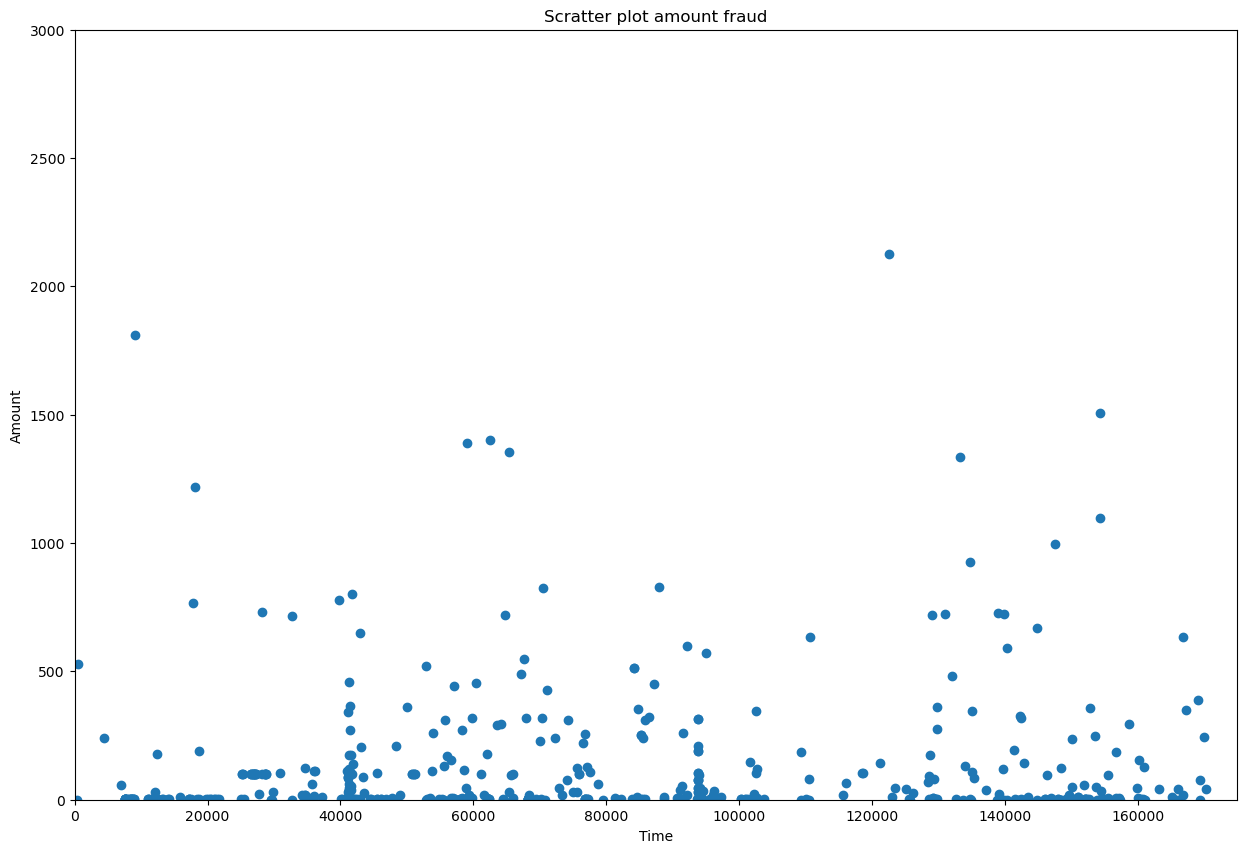

In [36]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,3000])
plt.show()

HISTOGRAM 

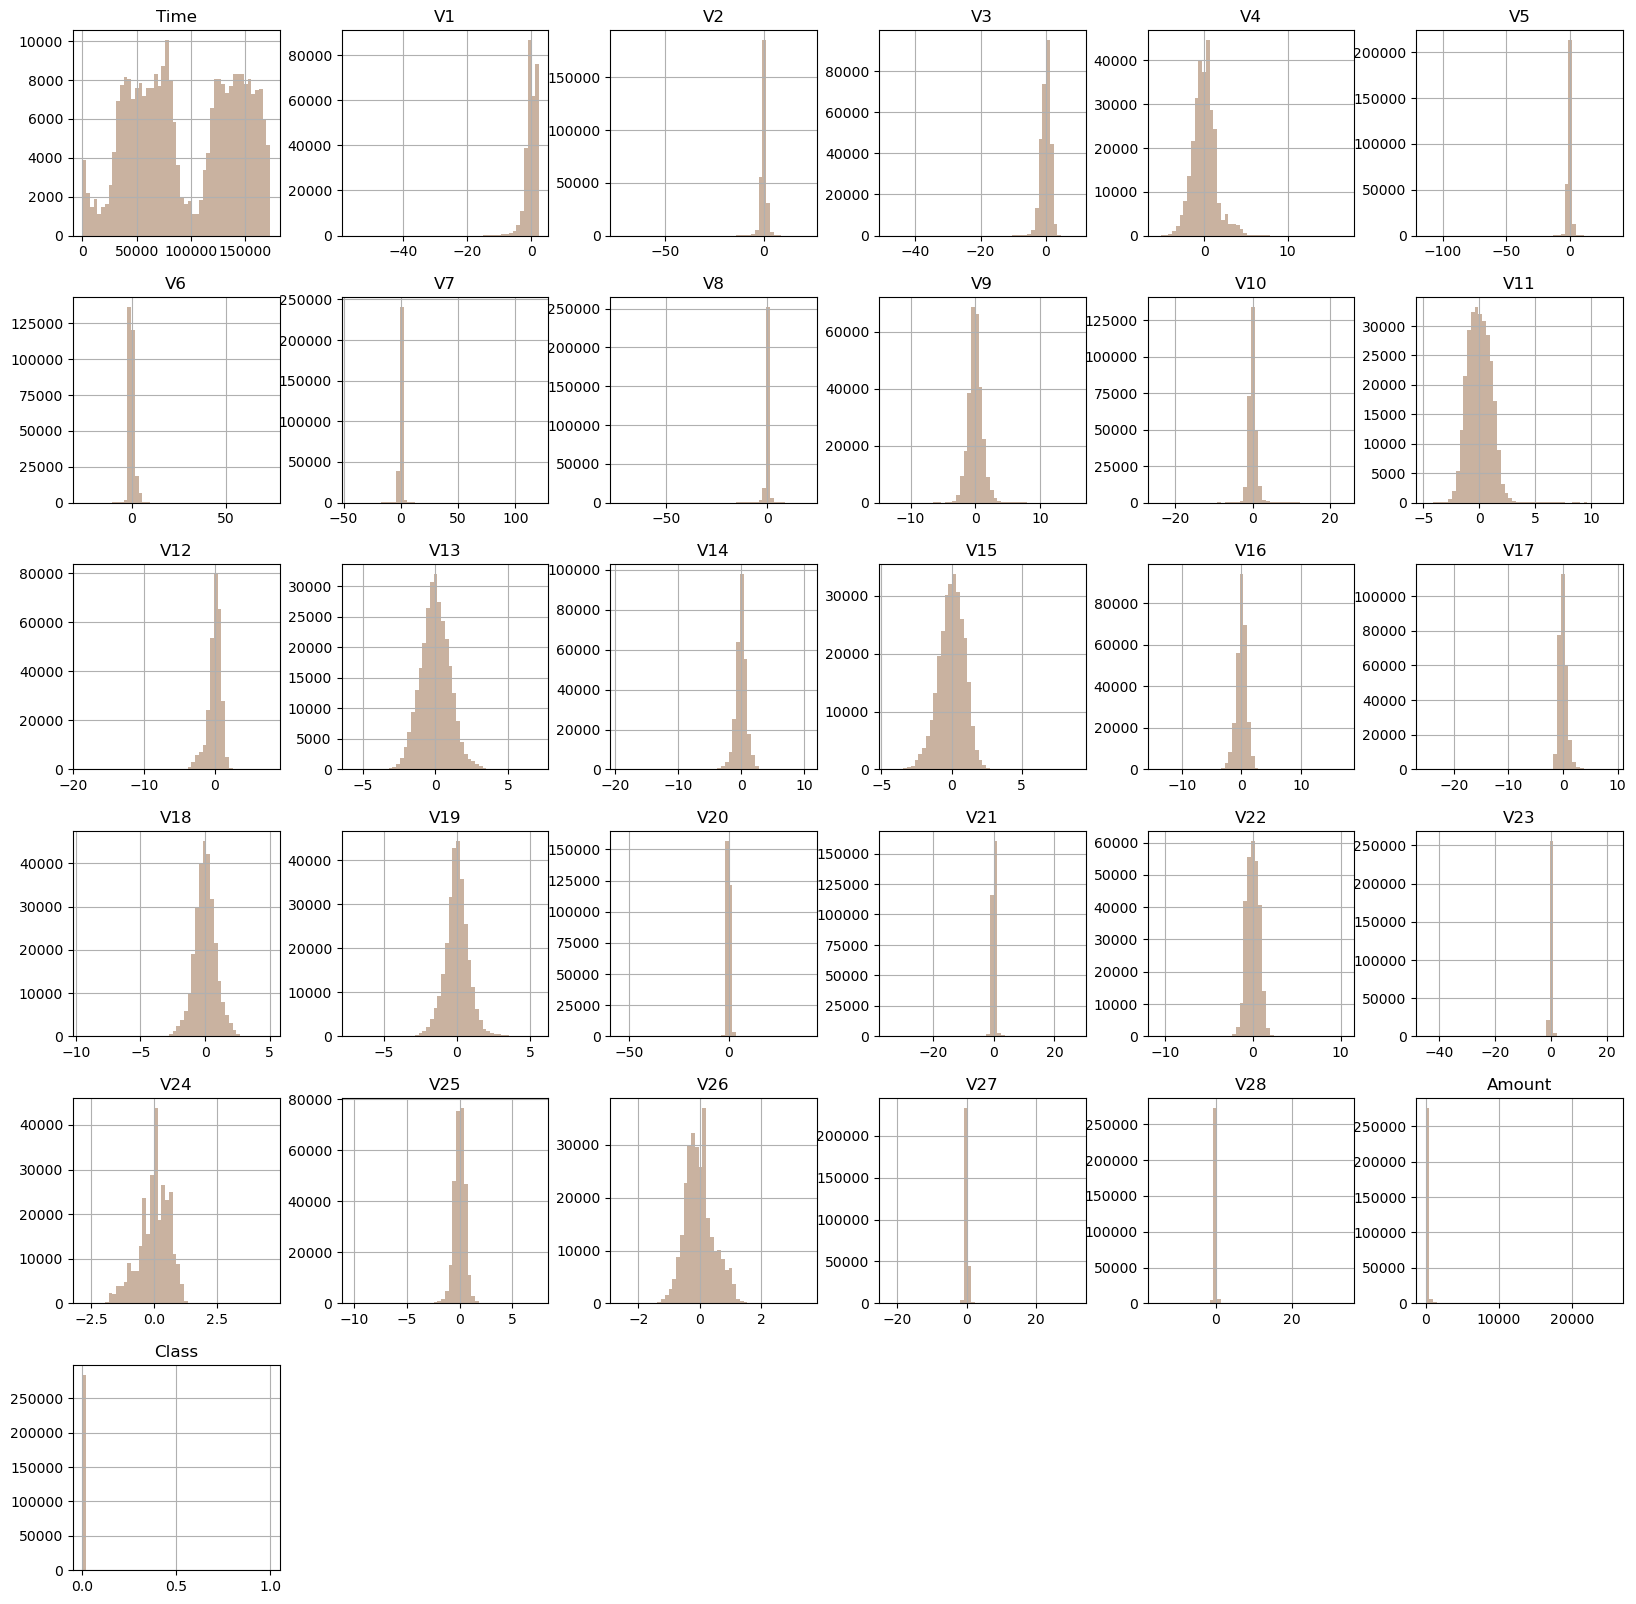

In [37]:
# Plot histograms for each feature
df.hist(figsize=(20, 20), bins=50,color='#C9B2A0')
plt.show()

# Dealing with Imbalanced data: 

>Address Imbalanced Data 

# 	Feature Engineering and feature selection.

<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h2 style="color: #8B4513;">StandardScaler </h2>


Standardization is a technique that transforms your features to have a standard normal distribution (<b>mean of 0 and standard deviation of 1<b/>). This ensures all features are on an equal footing, allowing the model to focus on the underlying relationships between them, rather than their original scales.

In [38]:
X = df.drop('Class', axis = 1)
y = df['Class'] #target variable we want to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#Apply standard scalar
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (227845, 30)
y_train shape: (227845,)


<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h2 style="color: #8B4513;">Smote </h2>


In machine learning, dealing with datasets that have uneven class distributions is a common challenge. This is where SMOTE comes in. <b>SMOTE stands for Synthetic Minority Oversampling Technique</b>. It's a technique specifically designed to address this issue.

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

Prediction and Evaluation 

# Model

<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h2 style="color: #8B4513;">Model </h2>


The task that we have at hand is a binary classification problem: a transaction is either fraudulent with the class value of 1, or legitimate with the class value of 0. Here, I train models from simple to more complex ones. These are, in the order of complexity:

<li>LogisticRegression</li>
<li>KNeighborsClassifier</li>
<li>RandomForestClassifier</li>
<li>DecisionTreeClassifier</li>
<li>XGBClassifier</li>
<li>naive_baye</li>

# Logistic Regression

In [40]:
def evaluate(model):
  model.fit(X_train,y_train)
  pre = model.predict(X_test)
    
  accuracy = accuracy_score(pre,y_test)
  recall = recall_score(pre,y_test)
  f1 = f1_score(pre,y_test)

  sns.heatmap(confusion_matrix(pre,y_test),annot=True,fmt='d')
  print(model)
  print('Accuracy : ',accuracy,'Recall : ',recall,"F1 : ",f1)

In [41]:
model= LogisticRegression()

In [42]:
# training the Logistic Regresion Model with Training data
model.fit(X_train, y_train)

LogisticRegression()

LogisticRegression(C=1000.0, random_state=42)
Accuracy :  0.9461873944850873 Recall :  0.9731463523795315 F1 :  0.9446093693432771


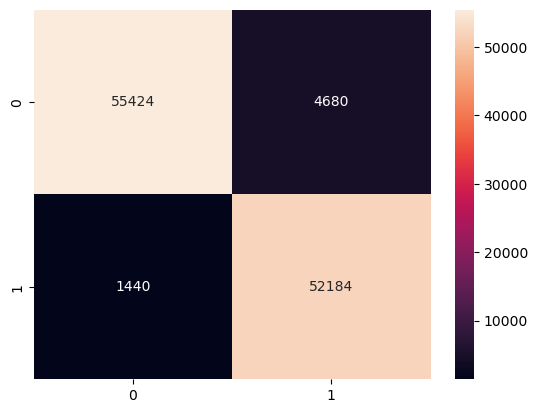

In [43]:
lsr_best = LogisticRegression(penalty='l2',C=1000.0,random_state = 42,  )
lsr_clf = lsr_best.fit(X_test,y_test)
evaluate(lsr_clf)

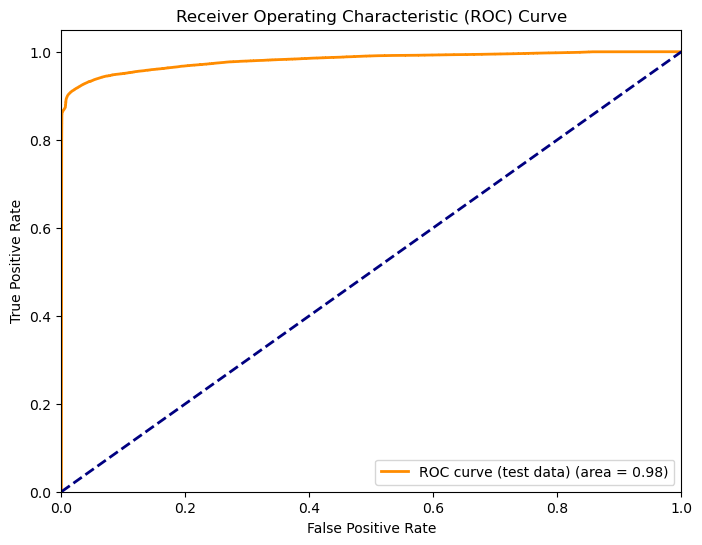

In [44]:
   # ROC Curve and AUC for Test Data
if hasattr(model, "predict_proba"):
        y_prob_test = model.predict_proba(X_test)[:, 1]
else:
        y_prob_test = model.decision_function(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test)
roc_auc_test = auc(fpr_test, tpr_test)
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label=f'ROC curve (test data) (area = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# KNN MODEL

In [45]:
# Initialize the KNN classifier
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

In [46]:
# Train the KNN classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
# Make predictions on the testing set
y_pred = knn.predict(X_test)

In [48]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9399971862689926


In [49]:
print('Recall Score :',recall_score(y_test, y_pred),  ' \n F1 Score : ', f1_score(y_test, y_pred))
print( 'Roc Score : ', roc_auc_score(y_test, y_pred))


Recall Score : 0.8810495216657288  
 F1 Score :  0.9362386006876963
Roc Score :  0.9399971862689926


In [50]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)


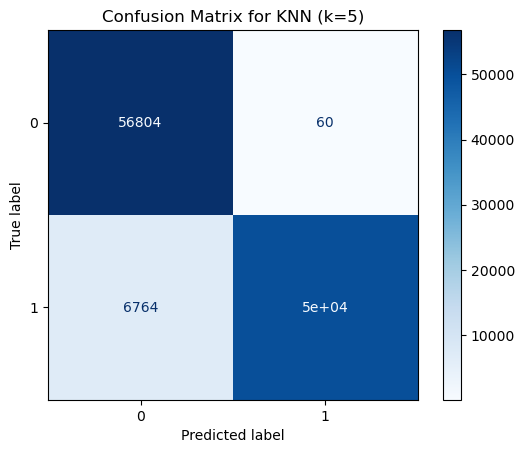

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Display confusion matrix
classes = np.unique(y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for KNN (k=5)')
plt.show()

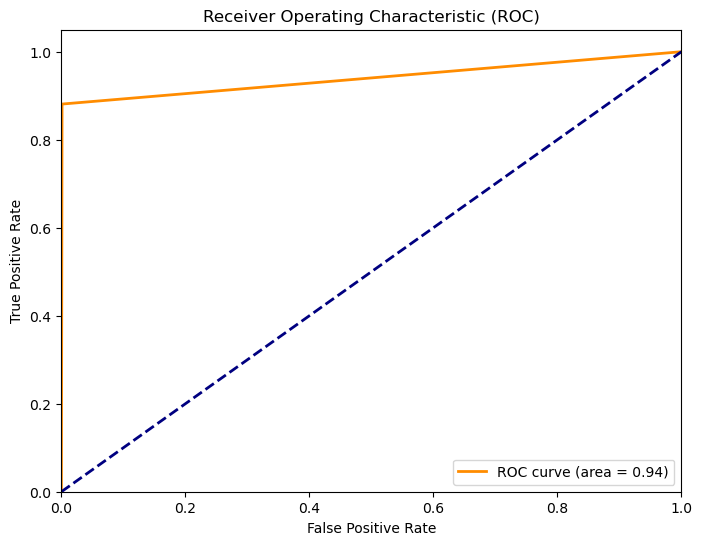

In [52]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# RandomForest Classifier

In [53]:
rf = RandomForestClassifier(max_depth=9, n_estimators=50)
RFC_clf = rf.fit(X_train, y_train)


In [54]:
y_pred = RFC_clf.predict(X_test)

In [55]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9472425436128307


In [56]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     56864
           1       1.00      0.90      0.94     56864

    accuracy                           0.95    113728
   macro avg       0.95      0.95      0.95    113728
weighted avg       0.95      0.95      0.95    113728



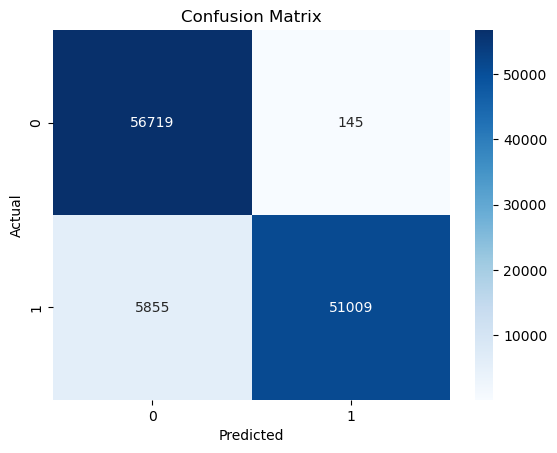

In [57]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


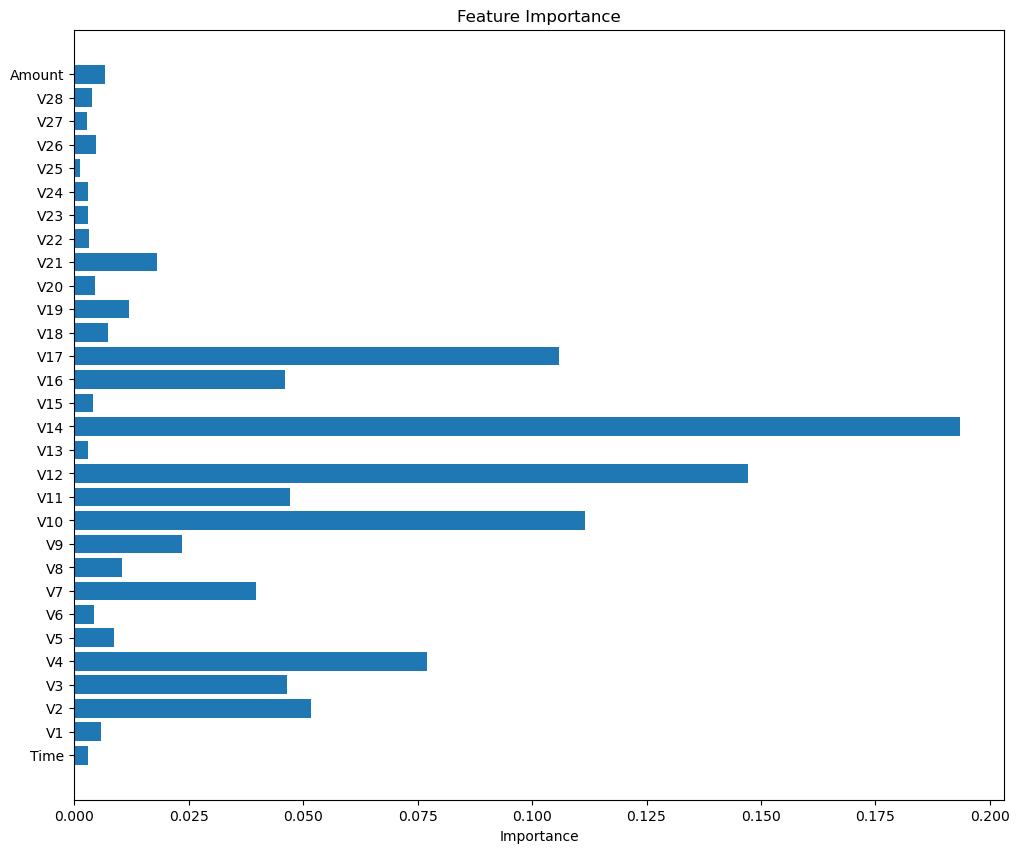

In [58]:
# Retrieve feature names from the DataFrame
# Retrieve feature importances
feature_importances = rf.feature_importances_
feature_names = df.columns[:-1]  # Assuming the target column is the last one

#Plot feature importances
plt.figure(figsize=(12,10))
plt.barh(feature_names, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# DECISION TREE MODEL

In [59]:

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier()

In [60]:
# Train the Decision Tree classifier
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [61]:
# Make predictions on the testing data
y_pred = decision_tree.predict(X_test)

In [62]:
# Evaluate the Decision Tree classifier
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree - Accuracy:", accuracy)

Decision Tree - Accuracy: 0.9024162915025323


In [63]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     56864
           1       1.00      0.81      0.89     56864

    accuracy                           0.90    113728
   macro avg       0.92      0.90      0.90    113728
weighted avg       0.92      0.90      0.90    113728



In [64]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

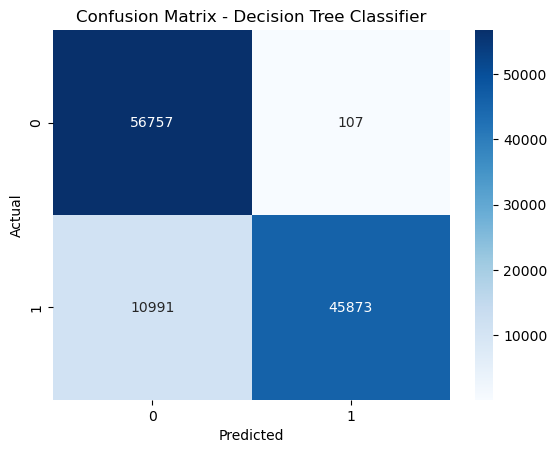

In [65]:
# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues" )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()

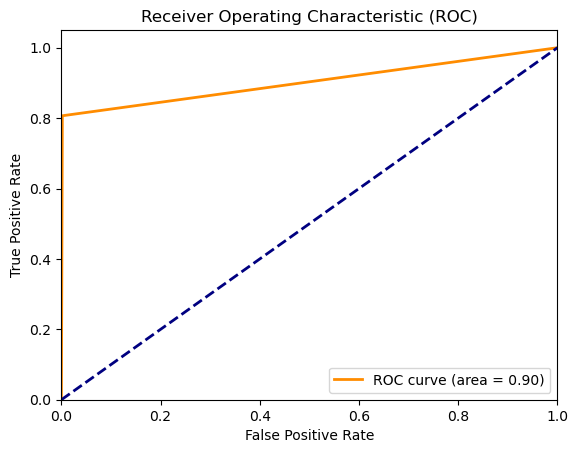

In [66]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# xGB BOOst MODEL

In [67]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [68]:
# Train XGBoost classifier
Xgb_model = xgb.XGBClassifier()
Xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
# Make predictions
y_pred = model.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy Score:", accuracy)

Accuracy Score: 0.9461698086662915


In [71]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

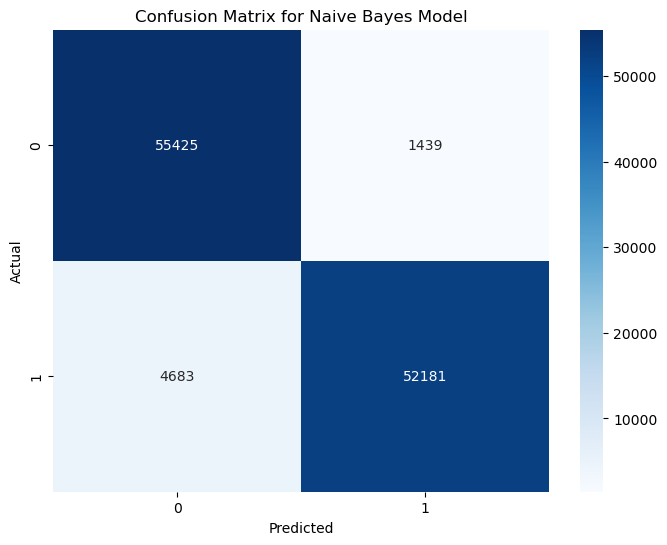

In [72]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

In [73]:
# You can also print a classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     56864
           1       0.97      0.92      0.94     56864

    accuracy                           0.95    113728
   macro avg       0.95      0.95      0.95    113728
weighted avg       0.95      0.95      0.95    113728



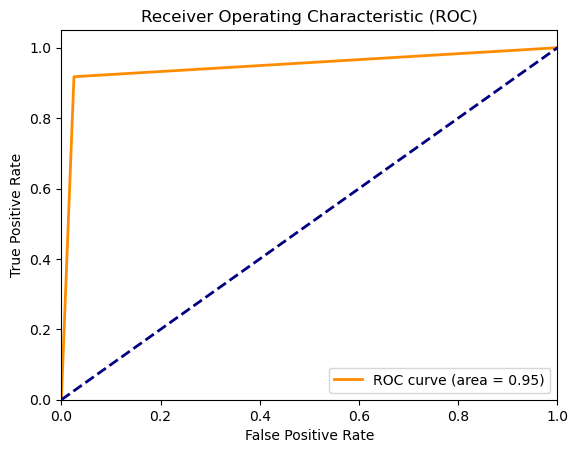

In [74]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes Model

In [75]:
from sklearn.naive_bayes import GaussianNB
# Create the Naive Bayes model
model = GaussianNB()

In [76]:
# Train the model
model.fit(X_train, y_train)

GaussianNB()

In [77]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [78]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9168454558244232


In [79]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[55535  1329]
 [ 8128 48736]]


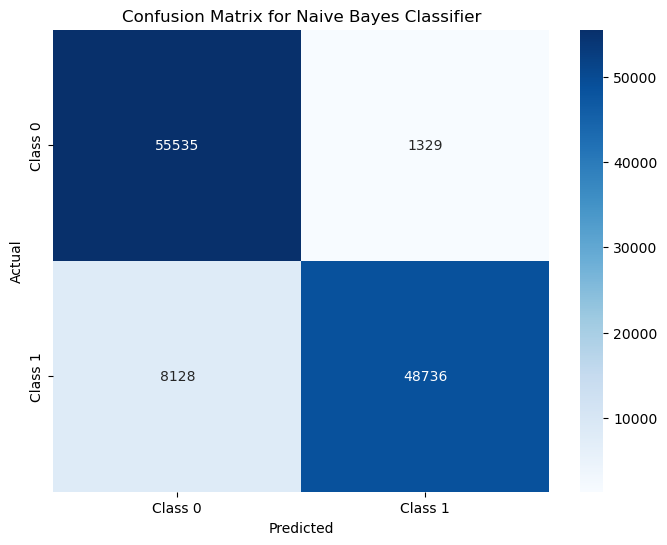

In [80]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

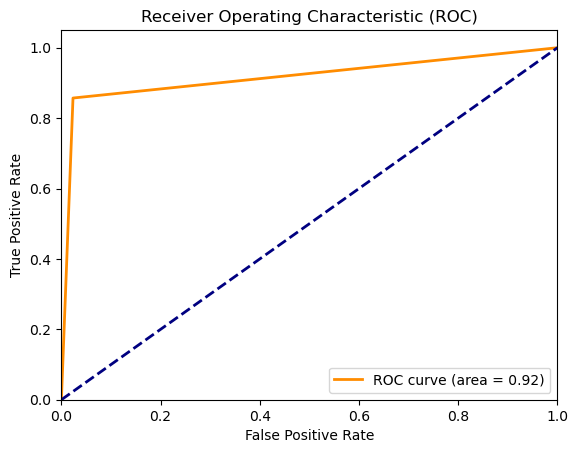

In [81]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Define models

In [82]:

# Assuming accuracy variables are floats between 0 and 1
LR_accuracy  =  0.9461
knn_accuracy =  0.9399
xgb_accuracy =  0.9504
dtc_accuracy =  0.9089
bn_accuracy  =  0.9168

model_scores = {
    'LogisticRegression': LR_accuracy,
    'KNeighborsClassifier': knn_accuracy,
    'XGBoost': xgb_accuracy,
    'DecisionTreeClassifier': dtc_accuracy,
    'GaussianNB': bn_accuracy
}

# Find the best model
best_model = max(model_scores, key=model_scores.get)
best_accuracy = model_scores[best_model]

print("Best Model:", best_model)
print("Accuracy:", best_accuracy)


Best Model: XGBoost
Accuracy: 0.9504


<div style="background-color: #F2EBE6; padding: 15px; border-radius: 10px; border: 2px solid #8B4513;">
<h2 style="color: #8B4513;">Best Model </h2>



Based on the accuracy scores you provided, the best performing model is XGBoost with an accuracy of <b>0.9504</b>.

# 	Hyperparameter Tuning/Model Improvement 

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
xgb = XGBClassifier()

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}



In [84]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [85]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [86]:
print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
Best Accuracy: 0.9997713795330079


In [87]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9499331738885762
